In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.units as u
import astropy.constants as c
%matplotlib inline

In [2]:
def zboldyrev(p):
    return (p/9.+1.-(1./3.)**(p/3.))

def zshe(p):
    return (p/9.+2.-2.*(2./3.)**(p/3.))

In [7]:
fcloud = ['M3','M4','M8']
fjeans = ['04','08','32']
fdir   = ['x','y','z']

ms = 10
lw = 7
xlim     = [ 0.0,6.2]
ylimzeta = [-1.5,5.0]

color = ['red','green','blue']

snM3 = np.array([ 0.7,1.2,1.8,2.6,3.8,4.3 ])
snM4 = np.array([ 0.4,2.1,3.8,5.3 ])
snM8 = np.array([ 0.6 ])

dsnM3 = np.array([ 100.,100.,79.85,56.73,100.,100. ]) * c.pc.to('km').value
dsnM4 = np.array([ 79.65,59.43,53.44,67.62 ]) * c.pc.to('km').value
dsnM8 = np.array([ 44.47 ]) * c.pc.to('km').value

snspeed = 100. / u.second.to('a')

snaM3 = snM3 + 1e-6 * dsnM3 / snspeed
snaM4 = snM4 + 1e-6 * dsnM4 / snspeed
snaM8 = snM8 + 1e-6 * dsnM8 / snspeed

mabM3 = np.array([ 1.2,2.8 ])
maeM3 = np.array([ 2.4,3.9 ])
mabM4 = np.array([ 1.5 ])
maeM4 = np.array([ 2.8 ])
mabM8 = np.array([ 1.0,2.5 ])
maeM8 = np.array([ 2.0,3.2 ])

(3) Jeans


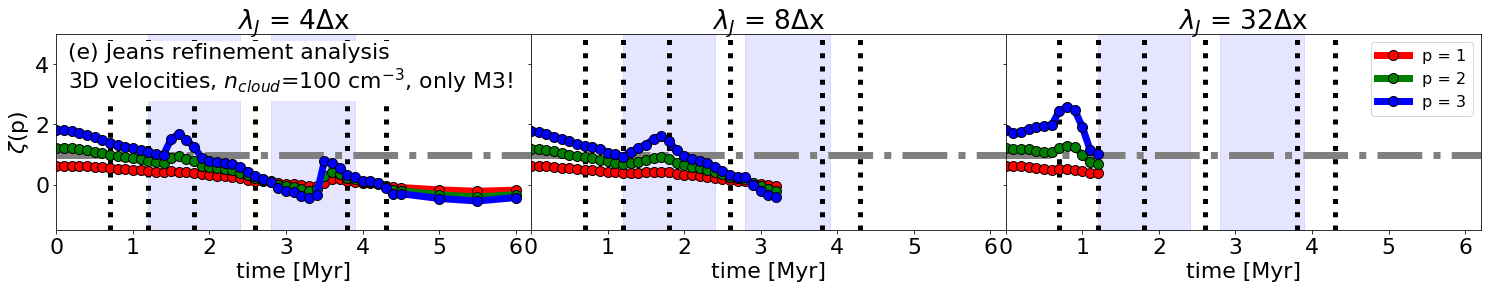

In [9]:
print('(3) Jeans')

plt.close()

dturb = '/Users/roxanachira/Dropbox/chira2018/pics/data/'

plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=3,nrows=1,sharex=True,sharey=True,figsize=(21,4.3))

for ijeans in range(len(fjeans)):
    dvsf = ('%svsfhr%s/' % (dturb,fjeans[ijeans]))
    cloud = fcloud[0]
    
    ax[ijeans].plot(np.array(xlim),np.zeros(len(xlim))+1.0,color='grey',ls='-.',lw=lw)
    ax[ijeans].set_xlim(xlim)
    ax[ijeans].set_ylim(ylimzeta)
    if(ijeans == 0): ax[ijeans].set_ylabel('$\zeta$(p)')
    
    for j in range(len(snM3)):
        ax[ijeans].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
    for j in range(len(mabM3)):
        ax[ijeans].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        ax[ijeans].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
        
    ax[ijeans].set_title('$\lambda_J$ = %i$\Delta$x' % (int(fjeans[ijeans]) ))
    ax[ijeans].set_xlabel('time [Myr]')
    if(ijeans == 0): 
        txtstr = "(e) Jeans refinement analysis\n3D velocities, $n_{cloud}$=100 cm$^{-3}$, only M3!"
        ax[ijeans].text(0.15,4.65,txtstr,alpha=1.0,backgroundcolor="white",verticalalignment='top')
    if(ijeans == 2): ax[ijeans].legend(loc=0,fontsize=16)
        
fig.tight_layout(pad=0.8)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('zeta_jeans.pdf')

(1) normal


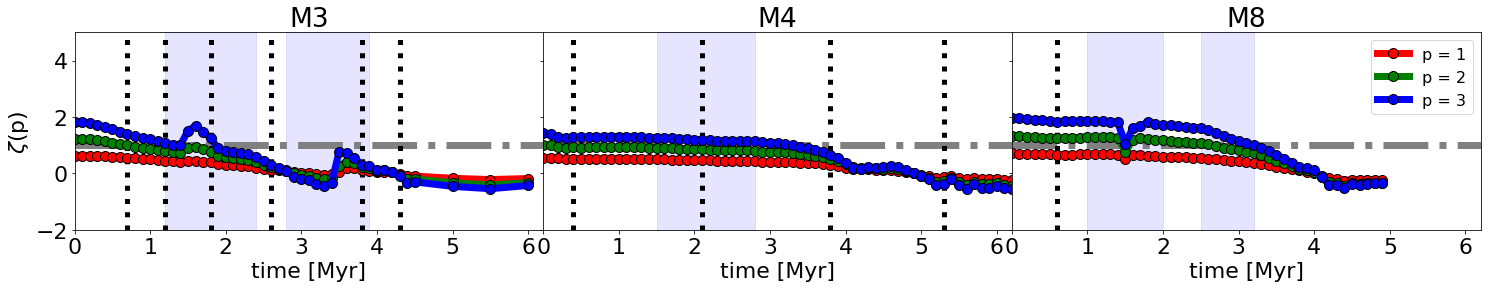

In [4]:
print('(1) normal')

plt.close()

dturb = '/Volumes/2TB-BACKUP/turbulence/strucfunc/'
dvsf  = dturb + 'vsfhr04/'

plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=3,nrows=1,sharex=True,sharey=True,figsize=(21,4.3))

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[icloud].plot(np.array(xlim),np.zeros(len(xlim))+1.0,color='grey',ls='-.',lw=lw)
    ax[icloud].set_xlim(xlim)
    ax[icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[icloud].set_ylabel('$\zeta$(p)')
        for j in range(len(snM3)):
            ax[icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        ax[icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
        
    ax[icloud].set_title(cloud)
    ax[icloud].set_xlabel('time [Myr]')
    if(icloud == 2): ax[icloud].legend(loc=0,fontsize=16)
        
fig.tight_layout(pad=0.8)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('zeta_normal.pdf')

(2) 1D


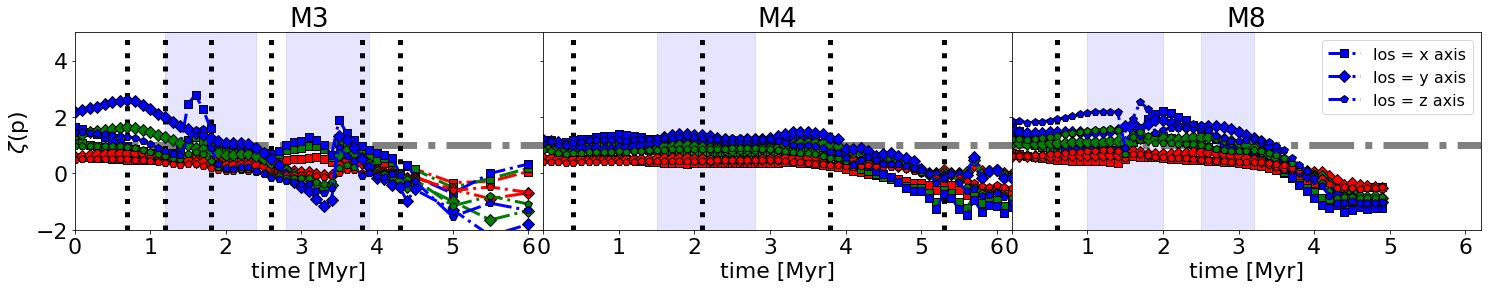

In [5]:
print('(2) 1D')

plt.close()

dturb = '/Volumes/2TB-BACKUP/turbulence/strucfunc/'
dvsf  = dturb + 'vsfhr04_1d/'

plt.rcParams['font.size'] = 22
fig,ax = plt.subplots(ncols=3,nrows=1,sharex=True,sharey=True,figsize=(21,4.3))

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[icloud].plot(np.array(xlim),np.zeros(len(xlim))+1.0,color='grey',ls='-.',lw=lw)
    ax[icloud].set_xlim(xlim)
    ax[icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[icloud].set_ylabel('$\zeta$(p)')
        for j in range(len(snM3)):
            ax[icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    for idir in fdir:
        ifile = glob((dvsf+'zeta_fitted_%s_%s.out' % (cloud,idir)))[0]
        time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
        time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
        
        if(idir == fdir[0]): marker = 's'
        elif(idir == fdir[1]): marker = 'D'
        elif(idir == fdir[2]): marker = 'p'
        
        ax[icloud].plot(time[0]-5,ylimzeta[0]-5,ms=ms-2,lw=lw-4,color=color[p-1],marker=marker,ls='-.',markeredgecolor='black',label=('los = %s axis' % (idir)))

        for p in range(1,4):
            if(p==1): zetap = zeta1
            if(p==2): zetap = zeta2
            if(p==3): zetap = zeta3
            ax[icloud].plot(time,zetap,ms=ms-2,lw=lw-4,color=color[p-1],marker=marker,ls='-.',markeredgecolor='black')
        
        
    ax[icloud].set_title(cloud)
    ax[icloud].set_xlabel('time [Myr]')
    if(icloud == 2): ax[icloud].legend(loc=0,fontsize=16)
        
fig.tight_layout(pad=0.8)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('zeta_1d.pdf')

(4) density threshold


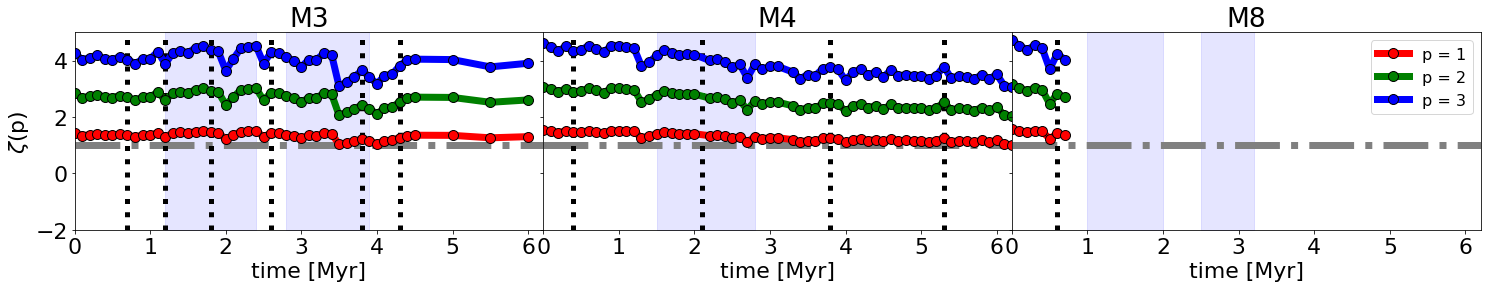

In [7]:
print('(4) density threshold')

plt.close()

dturb = '/Volumes/2TB-BACKUP/turbulence/strucfunc/'
dvsf  = dturb + 'vsfhr04_rand/'

plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=3,nrows=1,sharex=True,sharey=True,figsize=(21,4.3))

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[icloud].plot(np.array(xlim),np.zeros(len(xlim))+1.0,color='grey',ls='-.',lw=lw)
    ax[icloud].set_xlim(xlim)
    ax[icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[icloud].set_ylabel('$\zeta$(p)')
        for j in range(len(snM3)):
            ax[icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        ax[icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
        
    ax[icloud].set_title(cloud)
    ax[icloud].set_xlabel('time [Myr]')
    if(icloud == 2): ax[icloud].legend(loc=0,fontsize=16)
        
fig.tight_layout(pad=0.8)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('zeta_rand.pdf')

(5) density weighting


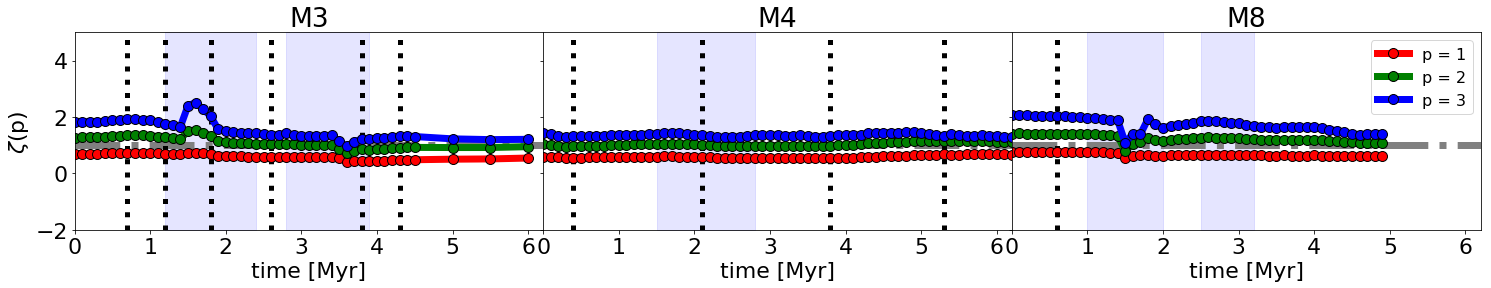

In [8]:
print('(5) density weighting')

plt.close()

dturb = '/Volumes/2TB-BACKUP/turbulence/strucfunc/'
dvsf  = dturb + 'vsfhr04_now/'

plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=3,nrows=1,sharex=True,sharey=True,figsize=(21,4.3))

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[icloud].plot(np.array(xlim),np.zeros(len(xlim))+1.0,color='grey',ls='-.',lw=lw)
    ax[icloud].set_xlim(xlim)
    ax[icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[icloud].set_ylabel('$\zeta$(p)')
        for j in range(len(snM3)):
            ax[icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        ax[icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
        
    ax[icloud].set_title(cloud)
    ax[icloud].set_xlabel('time [Myr]')
    if(icloud == 2): ax[icloud].legend(loc=0,fontsize=16)
        
fig.tight_layout(pad=0.8)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('zeta_now.pdf')